In [1]:
TRAIN_PATH = "D:/cats_and_dogs/data_split/train"

VAL_PATH = "D:/cats_and_dogs/data_split/val"

TEST_PATH = "D:/cats_and_dogs/data_split/test"

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import random

In [3]:
IMAGE_SIZE = 250
EPOCHS = 5
CHANNELS = 3
BATCH_SIZE = 256

In [4]:
train = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 25,
                           shear_range = 0.5,
                           zoom_range = 0.5,
                           width_shift_range = 0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True
                          )

validation = ImageDataGenerator(rescale = 1./255,
                           rotation_range = 25,
                           shear_range = 0.5,
                           zoom_range = 0.5,
                           width_shift_range = 0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True
                          )

In [5]:
train_data = train.flow_from_directory(TRAIN_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="binary",
                                       seed=42)

val_data = validation.flow_from_directory(VAL_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="binary",
                                       seed=42)

Found 7018 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [17]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [6]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [8]:
base_model.trainable = False

In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 200, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 200, 200, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [9]:
model = Sequential(
    [
        base_model,
        Flatten(),
        Dense(1, activation='sigmoid')  
    ]
)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 13, 13, 1280)     2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 13, 13, 1)         1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

In [12]:
history = model.fit(train_data,
                    steps_per_epoch = 7018//BATCH_SIZE,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = val_data
                   )

Epoch 1/5
27/27 [==============================] - 96s 3s/step - loss: 0.8934 - accuracy: 0.8654 - val_loss: 0.3404 - val_accuracy: 0.9476
Epoch 2/5
27/27 [==============================] - 88s 3s/step - loss: 0.3339 - accuracy: 0.9423 - val_loss: 0.2611 - val_accuracy: 0.9471
Epoch 3/5
27/27 [==============================] - 88s 3s/step - loss: 0.2348 - accuracy: 0.9506 - val_loss: 0.2919 - val_accuracy: 0.9416
Epoch 4/5
27/27 [==============================] - 88s 3s/step - loss: 0.2548 - accuracy: 0.9434 - val_loss: 0.2276 - val_accuracy: 0.9506
Epoch 5/5
27/27 [==============================] - 91s 3s/step - loss: 0.1983 - accuracy: 0.9505 - val_loss: 0.2507 - val_accuracy: 0.9486


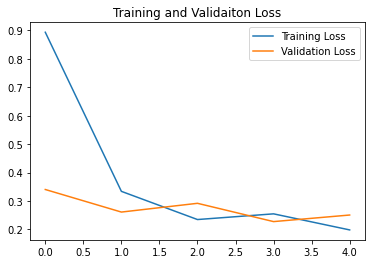

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend()
plt.title("Training and Validaiton Loss")
plt.show()

In [14]:
testing = ImageDataGenerator(rescale = 1./255)
test_data = testing.flow_from_directory(TEST_PATH, 
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                       batch_size=BATCH_SIZE, 
                                       class_mode="binary",
                                       seed=42)

Found 1005 images belonging to 2 classes.


In [15]:
results = model.evaluate(test_data)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

4/4 [==============================] - 5s 1s/step - loss: 0.0875 - accuracy: 0.9791
Test loss: 0.08745451271533966
Test accuracy: 0.9791044592857361


In [16]:
tf.keras.models.save_model(model,'cats_vs_dogs_v2.hdf5')